In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None) #automatic linebreaks and multiline cells

In [4]:
#read_csv to read the csv file
df = pd.read_csv('C:/Users/abhin/Downloads/Spotify/spotify-2023.csv', encoding='ISO-8859-1')

In [5]:
#info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [6]:
df.rename(columns={'artist(s)_name':"artists"}, inplace=True)

In [7]:
#checking for missing values

missing_values = df.isnull().sum()
missing_values[missing_values > 0]

in_shazam_charts    50
key                 95
dtype: int64

In [8]:
df['in_shazam_charts'] = df['in_shazam_charts'].replace({',': ''}, regex=True).astype(float)
df["in_shazam_charts"].fillna(0, inplace = True)
df['in_shazam_charts'] = df["in_shazam_charts"].astype(int)

print('Missing "in_shazam_charts" values after removal : ', df['in_shazam_charts'].isnull().sum())

Missing "in_shazam_charts" values after removal :  0


In [9]:
#remove the rows with missing key values
df = df.dropna(subset=['key'])

print('Missing "key" values after removal : ', df['key'].isnull().sum())

Missing "key" values after removal :  0


In [10]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [11]:
df.dtypes

track_name              object
artists                 object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts         int32
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [12]:
# Convert 'streams', 'in_deezer_playlists' columns to numerical data types
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')

In [13]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

streams                 1
in_deezer_playlists    75
dtype: int64

In [14]:
df['streams'].fillna(0, inplace=True)
df['streams'] = df['streams'].astype("int")
df['in_deezer_playlists'].fillna(0, inplace=True)

In [15]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [16]:
def to_month_name(month):
    month_names = ["", "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    return month_names[month]

In [17]:
df['released_month'] = (df['released_month']).apply(to_month_name)

In [18]:
#get the csv file for visualization
df.to_csv('spotify-cleaned.csv', index=False)

In [19]:
# Turning the artists column into list instead of a single string
artists = []

for row in df['artists']:
    item = row.split(',')
    artists.append(item)

df['artists'] = artists
df.head()

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"[Latto, Jung Kook]",2,2023,July,14,553,147,141381703,43,263,45.0,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,[Myke Towers],1,2023,March,23,1474,48,133716286,48,126,58.0,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,[Olivia Rodrigo],1,2023,June,30,1397,113,140003974,94,207,91.0,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,[Taylor Swift],1,2019,August,23,7858,100,800840817,116,207,125.0,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,[Bad Bunny],1,2023,May,18,3133,50,303236322,84,133,87.0,15,425,144,A,Minor,65,23,80,14,63,11,6


In [20]:
artists_flattened = []
for item in artists:
    artists_flattened.extend(item)

In [21]:
artists_true_counts = pd.Series(artists_flattened).value_counts()

Taylor Swift      31
The Weeknd        27
Bad Bunny         23
Kendrick Lamar    23
SZA               21
Drake             18
Feid              15
Harry Styles      13
 Bad Bunny        13
 Metro Boomin     12
dtype: int64

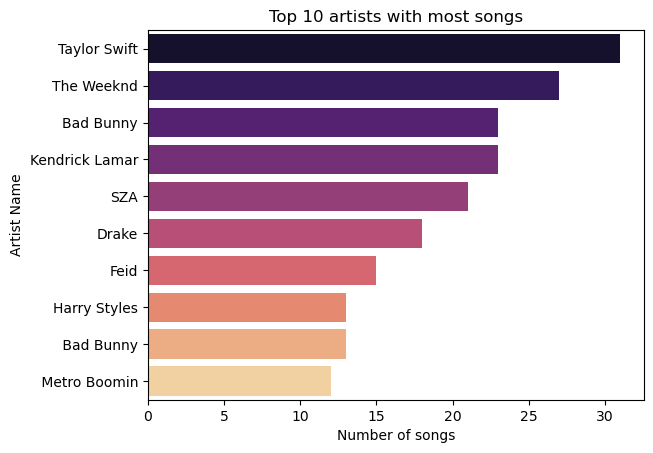

In [25]:
#Top 10 artists with most songs
top_artists = artists_true_counts.head(10)

sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')
plt.title("Top 10 artists with most songs")
plt.xlabel("Number of songs")
plt.ylabel("Artist Name")

top_artists

Text(0.5, 1.0, 'Top 10 songs streamed on Spotify')

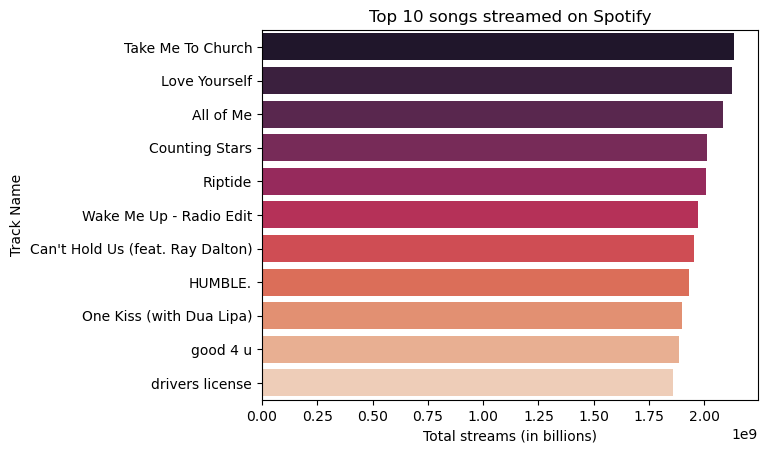

In [28]:
#Top 10 streamed songs on Spotify
top_streamed_spotify = df[['track_name', 'artists' , 'streams', 'released_year']].sort_values(by='streams', ascending=False);

sns.barplot(x=top_streamed_spotify[:11]['streams'], y=top_streamed_spotify[:11]['track_name'], palette='rocket')
plt.xlabel("Total streams (in billions)")
plt.ylabel("Track Name")
plt.title("Top 10 songs streamed on Spotify")

Text(0.5, 1.0, 'Top 10 songs saved on Spotify playlists')

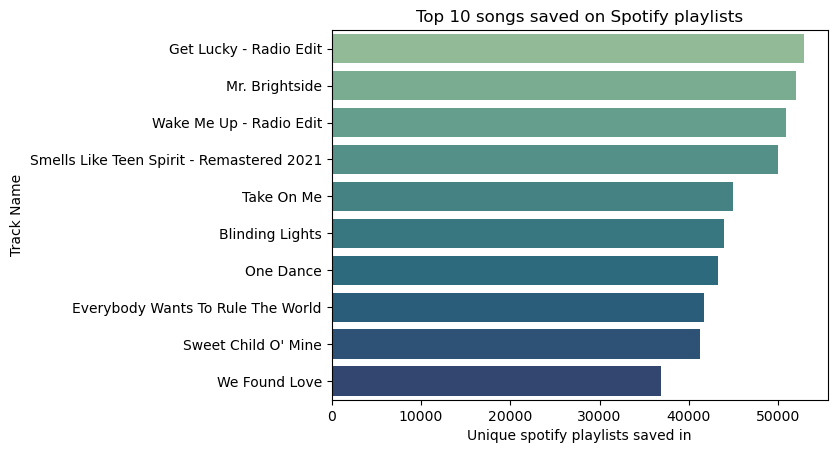

In [29]:
#Top 10 songs saved in Spotify playlists
top_in_spotify_playlists = df[['track_name', 'artists' , 'in_spotify_playlists']].sort_values(by='in_spotify_playlists', ascending=False).head(10);

sns.barplot(x=top_in_spotify_playlists['in_spotify_playlists'], y=top_in_spotify_playlists['track_name'], palette='crest')
plt.xlabel("Unique spotify playlists saved in")
plt.ylabel("Track Name")
plt.title("Top 10 songs saved on Spotify playlists")

Text(0.5, 1.0, 'Top 10 songs saved on Apple playlists')

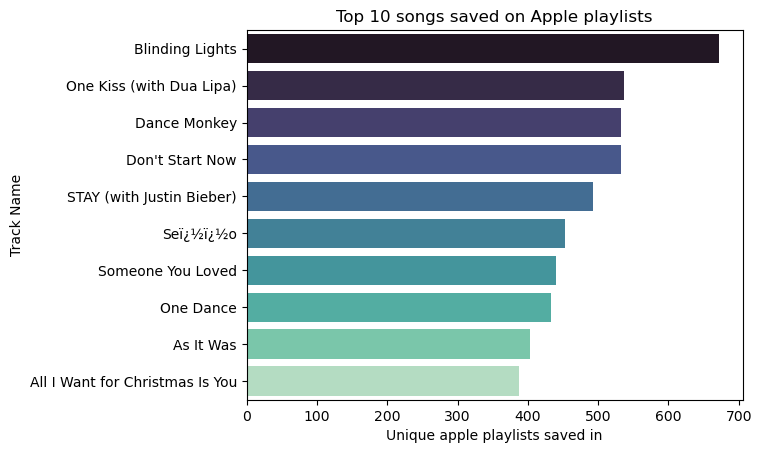

In [30]:
#Top 10 songs saved on Apple playlists
top_in_apple_playlists = df[['track_name', 'artists' , 'in_apple_playlists']].sort_values(by='in_apple_playlists', ascending=False).head(10);

sns.barplot(x=top_in_apple_playlists['in_apple_playlists'], y=top_in_apple_playlists['track_name'], palette='mako')
plt.xlabel("Unique apple playlists saved in")
plt.ylabel("Track Name")
plt.title("Top 10 songs saved on Apple playlists")

Text(0.5, 1.0, 'Top 10 songs saved on Deezer playlists')

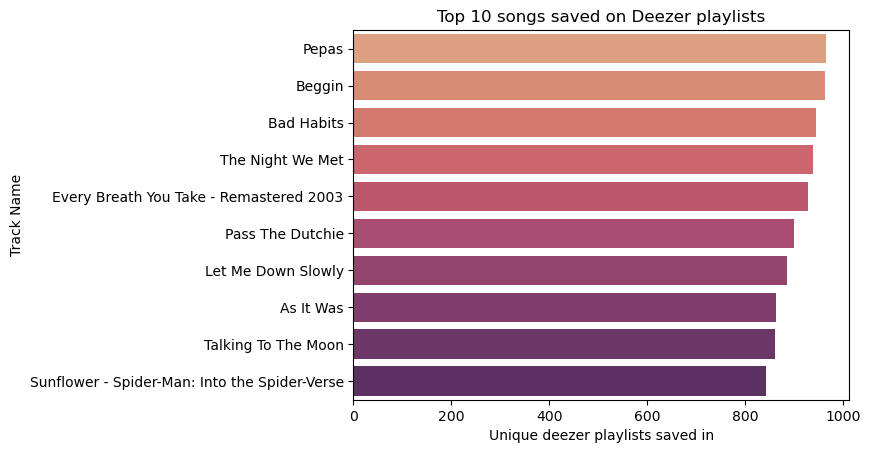

In [32]:
#Top 10 songs saved on Deezer playlists
top_in_deezer_playlists = df[['track_name', 'artists' , 'in_deezer_playlists']].sort_values(by='in_deezer_playlists', ascending=False).head(10);

sns.barplot(x=top_in_deezer_playlists['in_deezer_playlists'], y=top_in_deezer_playlists['track_name'], palette='flare')
plt.xlabel("Unique deezer playlists saved in")
plt.ylabel("Track Name")
plt.title("Top 10 songs saved on Deezer playlists")

In [33]:
cross_platform_columns = [
    'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 
    'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts'
]

In [34]:
cross_platform_corr_matrix = df[cross_platform_columns].corr()
cross_platform_corr_matrix

,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
in_spotify_playlists,1.000000,0.173546,0.708098,0.259416,0.236444,0.147870,0.061743
in_spotify_charts,0.173546,1.000000,0.235219,0.552055,0.097009,0.581850,0.537464
in_apple_playlists,0.708098,0.235219,1.000000,0.408858,0.412618,0.359203,0.086826
in_apple_charts,0.259416,0.552055,0.408858,1.000000,0.163386,0.371166,0.390395
in_deezer_playlists,0.236444,0.097009,0.412618,0.163386,1.000000,0.274779,0.033729
in_deezer_charts,0.147870,0.581850,0.359203,0.371166,0.274779,1.000000,0.344083
in_shazam_charts,0.061743,0.537464,0.086826,0.390395,0.033729,0.344083,1.000000


Text(0.5, 1.0, 'Correlation Heatmap: Cross-Platform Metrics')

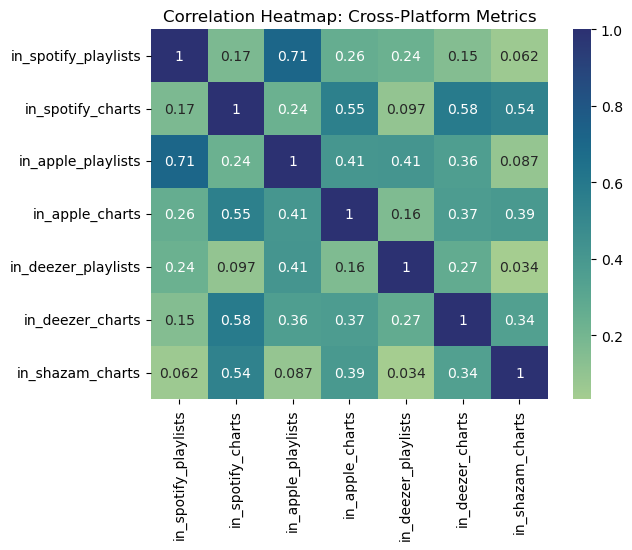

In [35]:
sns.heatmap(cross_platform_corr_matrix, annot=True, cmap='crest')
plt.title('Correlation Heatmap: Cross-Platform Metrics')

Text(0.5, 1.0, "Correlation Heatmap: Song's Attribute Metrics")

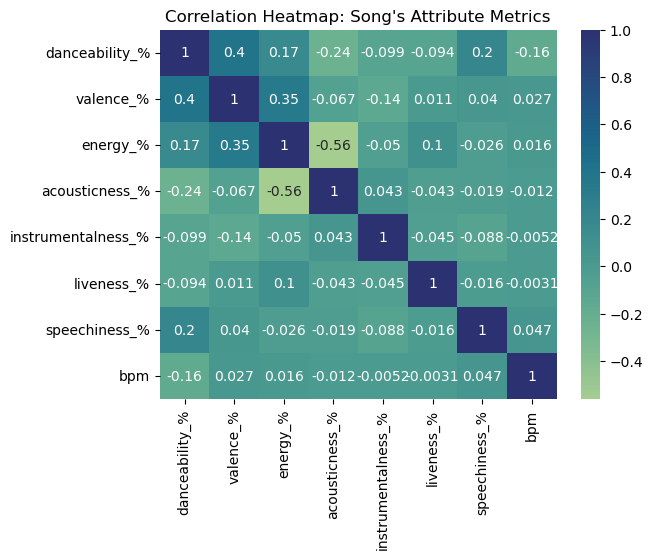

In [36]:
attribute_columns = ["danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%", "liveness_%", "speechiness_%", 'bpm']
attribute_corr_matrix = df[attribute_columns].corr()
attribute_corr_matrix

sns.heatmap(attribute_corr_matrix, annot=True, cmap='crest')
plt.title("Correlation Heatmap: Song's Attribute Metrics")

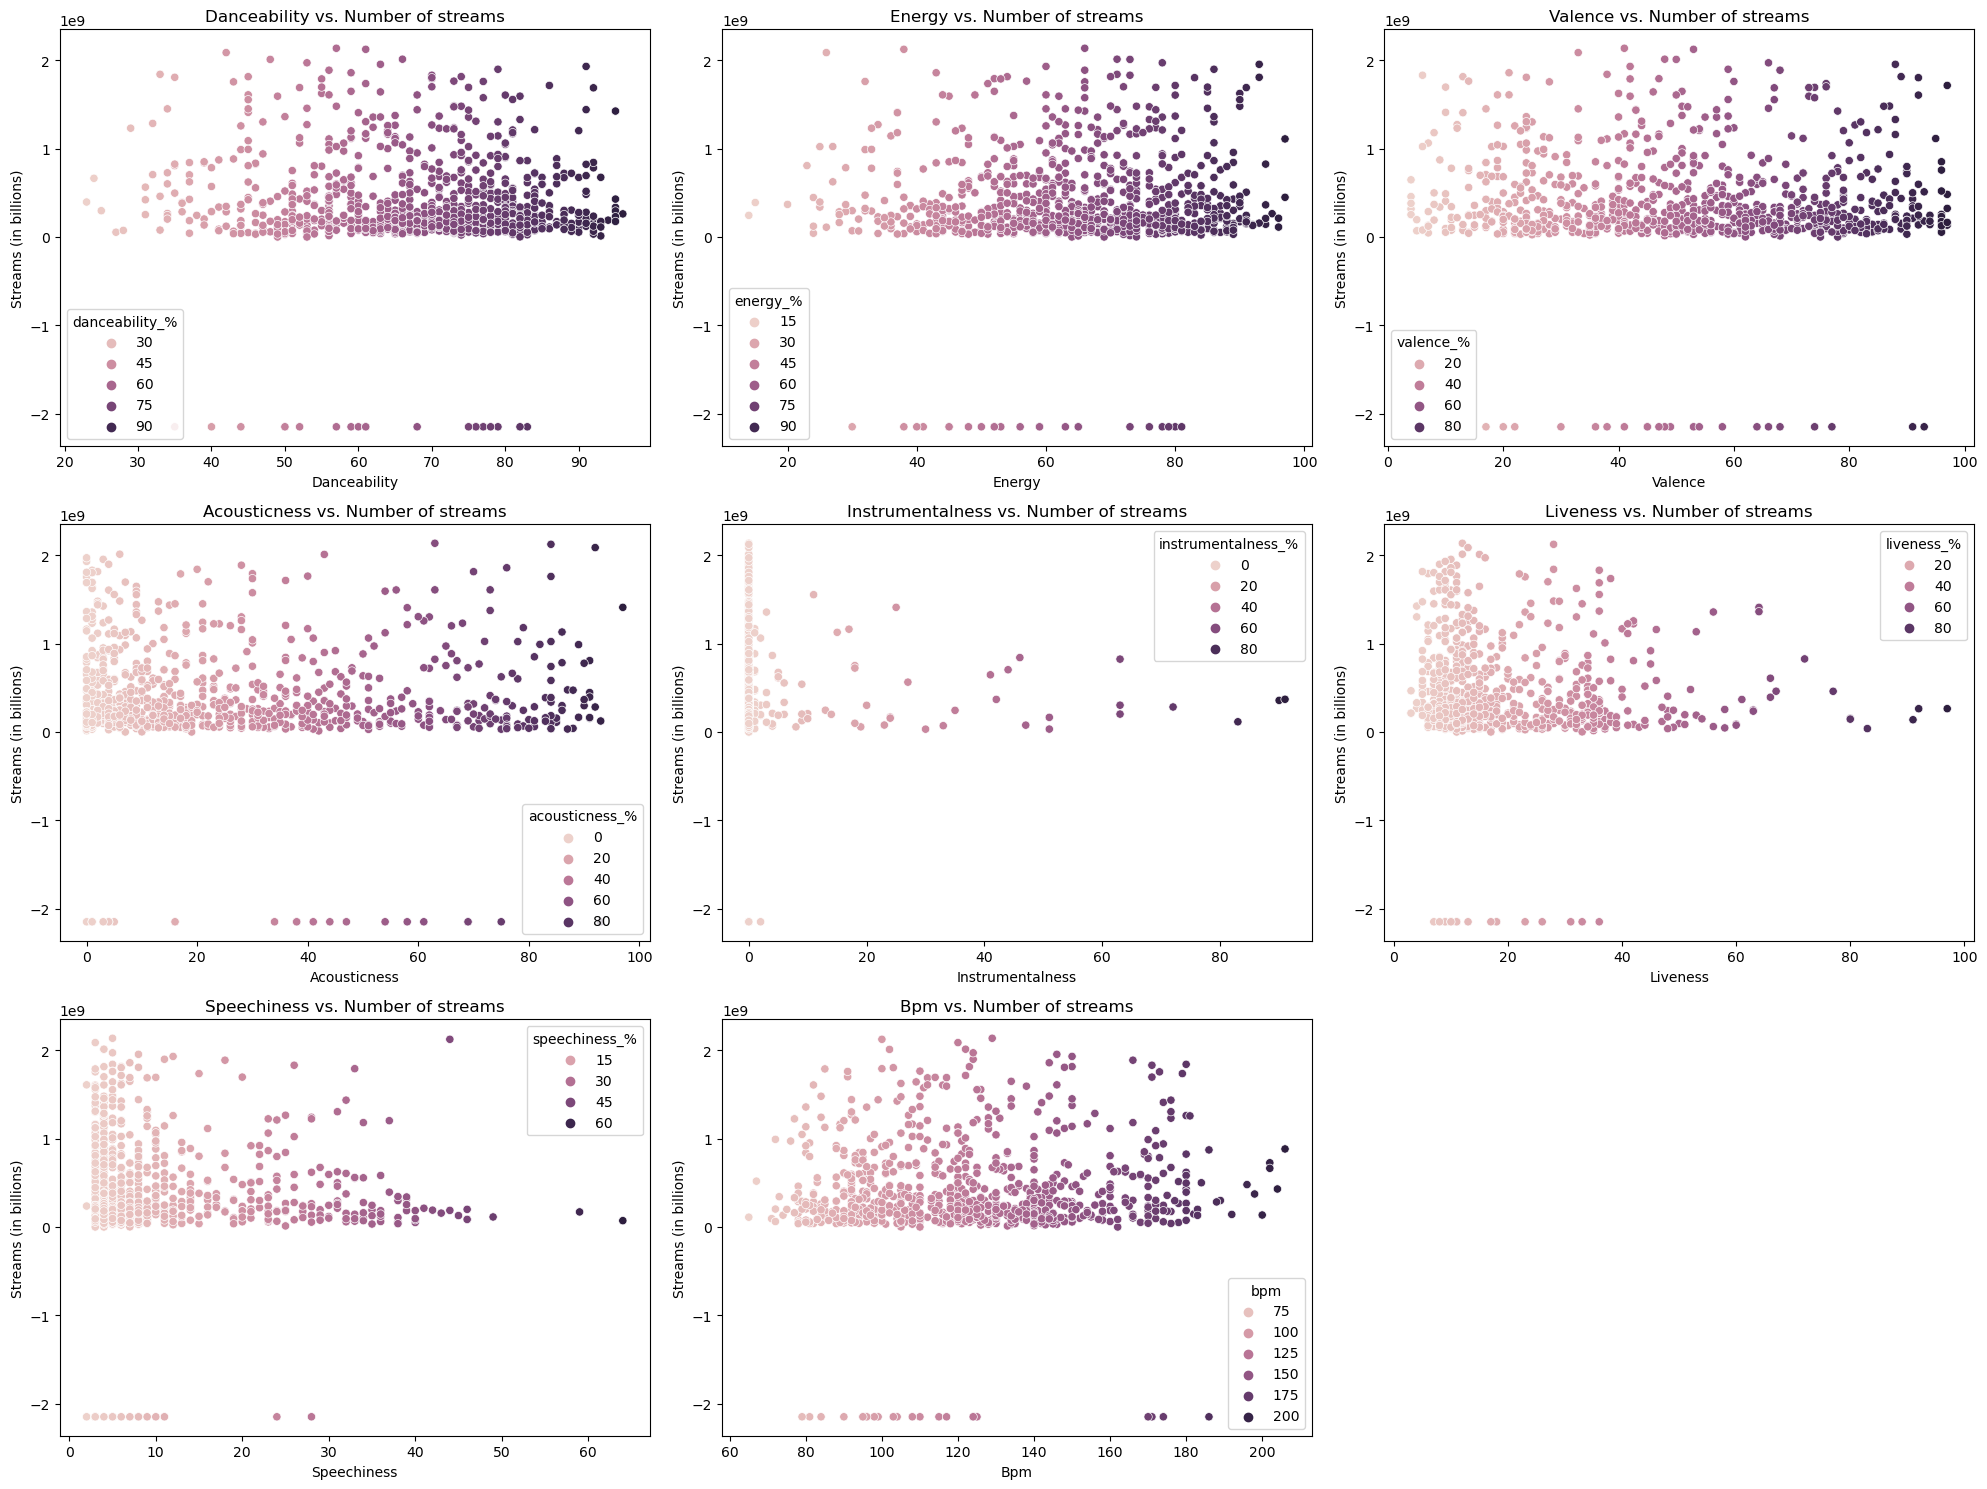

In [37]:
features_columns = ['danceability_%', 'energy_%', 'valence_%', "acousticness_%",  "instrumentalness_%", "liveness_%", "speechiness_%", "bpm"]

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_columns, start=1):
    plt.subplot(3, 3, i)
    plt.title(feature.replace("_%","").capitalize() + " vs. Number of streams")
    plt.ylabel('Streams (in billions)')
    plt.xlabel(feature.replace("_%","").capitalize())
    sns.scatterplot(x=df[feature], y=df['streams'], hue=df[feature])
    
plt.tight_layout()

2022    362
2023    159
2021    107
2019     33
2020     29
2017     21
2016     18
2014     13
2013     11
2018     10
Name: released_year, dtype: int64

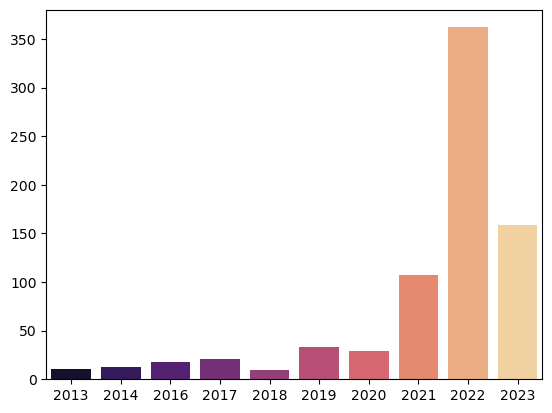

In [39]:
released_year = df['released_year'].value_counts().head(10)

sns.barplot(x=released_year.index, y=released_year.values ,palette='magma')

released_year

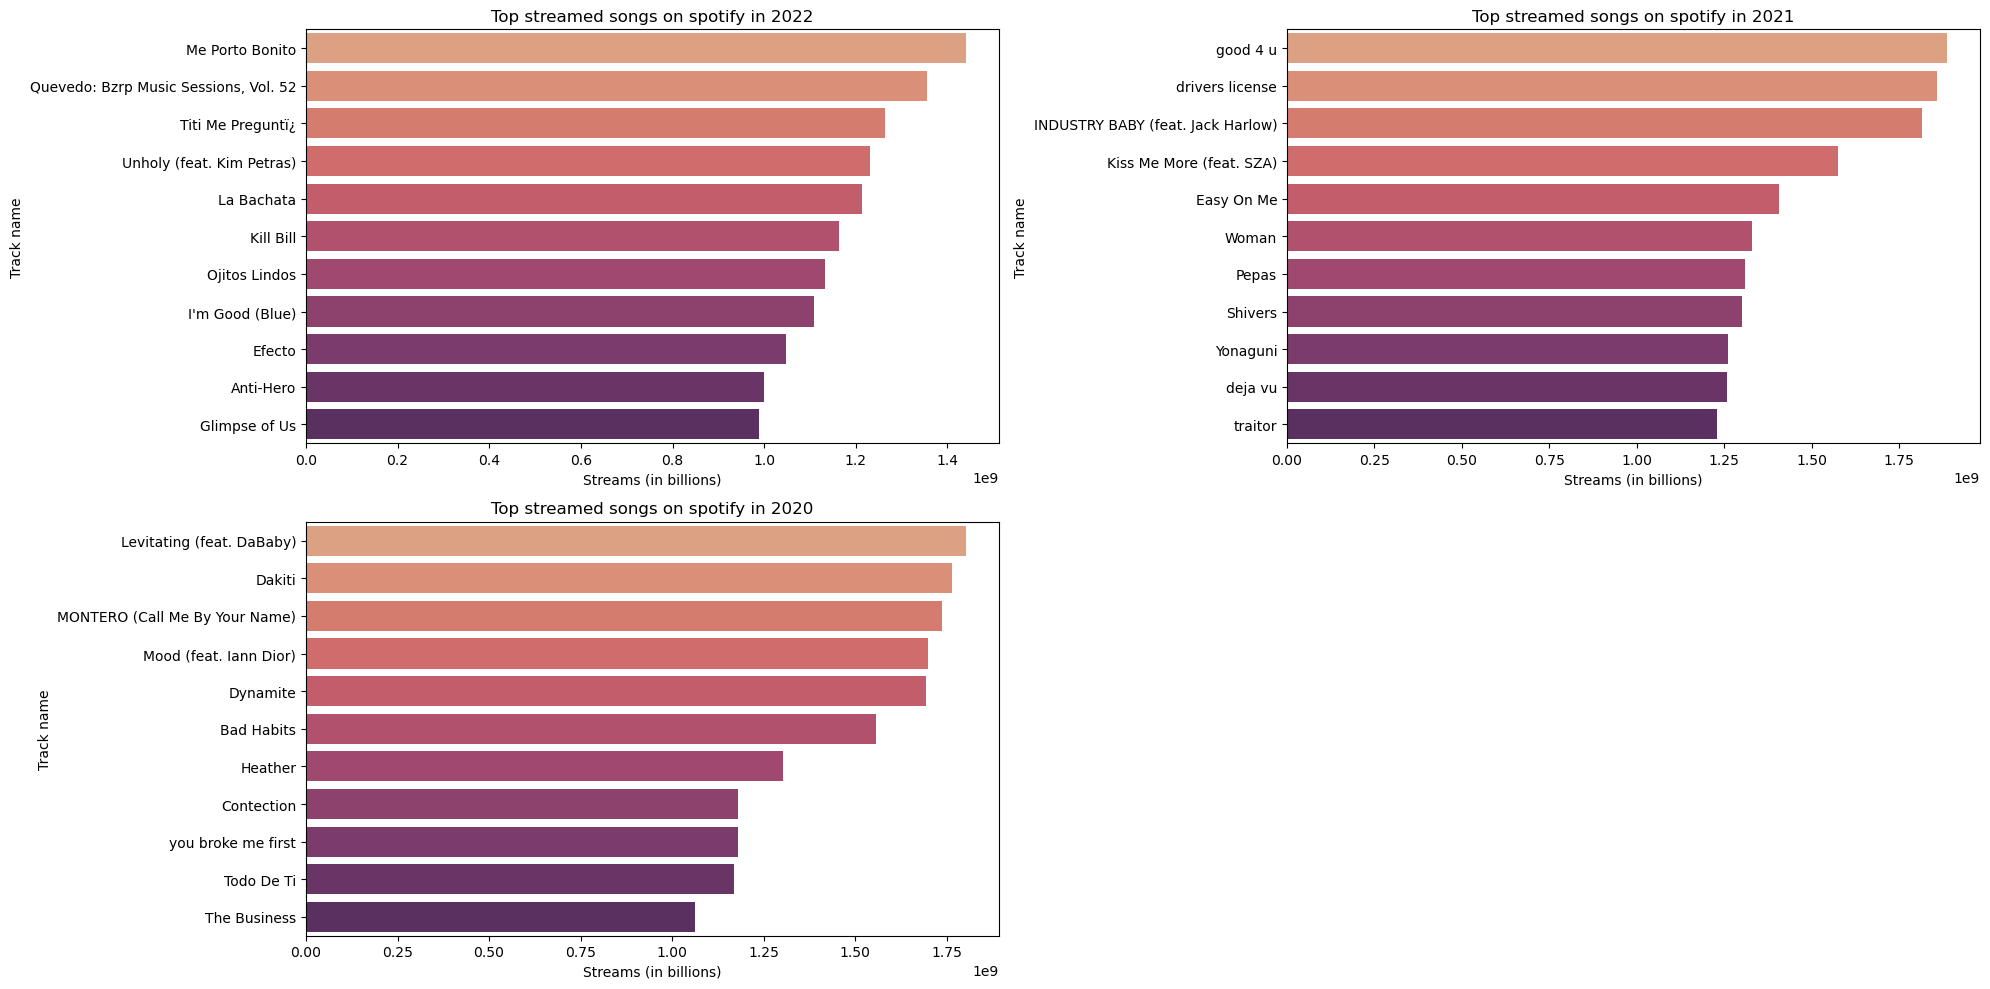

In [41]:
years = ['2022', '2021', '2020']

plt.figure(figsize=(20, 10))
for i, year in enumerate(years, start=1):
    plt.subplot(2, 2, i)
    top_spotify_songs = df[df.released_year == int(year)].sort_values(by='streams', ascending=False)
    sns.barplot(x = top_spotify_songs['streams'][:11], y = top_spotify_songs['track_name'][:11], palette = 'flare') 
    plt.title("Top streamed songs on spotify in " + year)
    plt.ylabel('Track name')
    plt.xlabel('Streams (in billions)')
    
plt.tight_layout()